# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
# Install requirements
!python -m pip install -r requirements.txt
!pip install ipywidgets
!pip install --upgrade pyzmq ipykernel jupyter-client jupyter-core traitlets
!pip install --upgrade jupyter ipywidgets


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 851 kB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 39.9 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 42.4 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.0 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 67.5 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 41.6 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 58.1 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 69.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 50.3 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 70.5 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 11.2 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 64.9 MB/s eta 0:00:01
     |███████████████████

## Imports

In [3]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from time import time

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [4]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(), # change image to num value.
    transforms.Normalize((0.56,), (0.56,)) # normalizing the tensor with mean and standard deviation,
])

# Create training set and define training dataloader
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Create test set and define test dataloader
test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

because the chosen transformations (transforms.ToTensor() and transforms.Normalize()) are essential for efficient training and optimal performance on image classification tasks. Without normalization, the gradients might have different scales, leading to slower convergence and potentially getting stuck in local minima.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [5]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

4


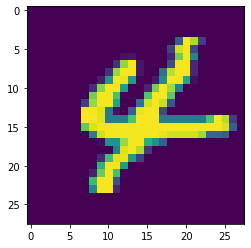

3


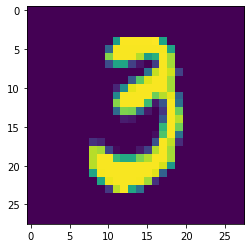

2


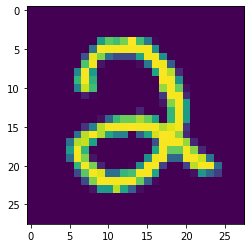

0


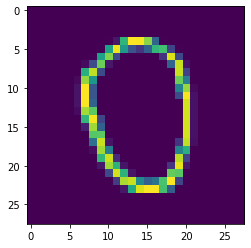

2


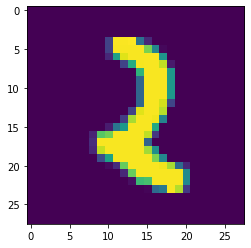

In [6]:
# Explore data
show5(train_dataloader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [7]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [8]:
criterion = nn.NLLLoss() 
optimizer = optim.Adam(model.parameters(), lr=0.003)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [13]:
epochs = 15

def train_model(model, device, train_dataloader, optimizer, criterion, epochs):
  """
  Trains the model on either CPU or GPU, preserving the original structure
  while addressing potential shape mismatches and flattening requirements.

  Args:
    model (torch.nn.Module): The model to be trained.
    device (torch.device): The device to use for training ("cpu" or "cuda").
    train_dataloader (torch.utils.data.DataLoader): The training data loader.
    optimizer (torch.optim.Optimizer): The optimizer used for training.
    criterion (torch.nn.Module): The loss function used for training.
    epochs (int): The number of training epochs.

  Returns:
    None
  """

  train_loss = []  # List to store training loss for each epoch

  time0 = time()

  for e in range(epochs):
    running_loss = 0
    for images, labels in train_dataloader:
      # Data movement
      images = images.to(device)

      # Check for flattening necessity (considering MNIST format)
      if images.shape[1] != 784:  # Flatten only if image shape is not 784
        images = images.view(images.shape[0], -1)

      labels = labels.to(device)

      # Training pass
      optimizer.zero_grad()

      output = model(images)
      loss = criterion(output, labels)

      # Backpropagation and optimization
      loss.backward()
      optimizer.step()

      running_loss += loss.item()

    # Calculate and store average training loss for the epoch
    avg_train_loss = running_loss / len(train_dataloader)
    train_loss.append(avg_train_loss)

    print("Epoch {} - Training loss: {}".format(e, avg_train_loss)) 

  print("\nTraining Time (in minutes) =", (time() - time0) / 60)

  return train_loss  # Return the training loss list

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move model to the chosen device

train_loss = train_model(model, device, train_dataloader, optimizer, criterion, epochs)


Epoch 0 - Training loss: 0.07470629022924352
Epoch 1 - Training loss: 0.07102588755262297
Epoch 2 - Training loss: 0.069917835016511
Epoch 3 - Training loss: 0.06835482910839913
Epoch 4 - Training loss: 0.06636543239529273
Epoch 5 - Training loss: 0.0665752001274505
Epoch 6 - Training loss: 0.06274562331145135
Epoch 7 - Training loss: 0.06491590188551215
Epoch 8 - Training loss: 0.06460078965386883
Epoch 9 - Training loss: 0.06028293501712625
Epoch 10 - Training loss: 0.05516437017383041
Epoch 11 - Training loss: 0.06092202823514418
Epoch 12 - Training loss: 0.05606872778295463
Epoch 13 - Training loss: 0.058147819452654216
Epoch 14 - Training loss: 0.05545527783027892

Training Time (in minutes) = 2.865226097901662


Plot the training loss (and validation loss/accuracy, if recorded).

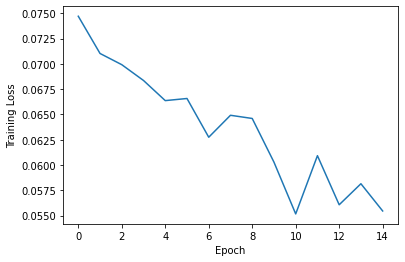

In [15]:
def plot_training_loss(train_loss):
  # Plot the training loss
  plt.plot(train_loss)
  plt.xlabel('Epoch')
  plt.ylabel('Training Loss')
  plt.show()


plot_training_loss(train_loss)

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [16]:
correct = 0
total = 0
with torch.no_grad():
  for images, labels in test_dataloader:
    images = images.to(device)

    # Ensure consistent flattening for all images
    images = images.view(images.shape[0], -1)  # Flatten regardless of device or shape

    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the model : %d %%' % (100 * correct / total))


Accuracy of the model : 96 %


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [17]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)
epochs = 20

def train_model(model, device, train_dataloader, optimizer, criterion, epochs):
 
  train_loss = []  # List to store training loss for each epoch

  time0 = time()

  for e in range(epochs):
    running_loss = 0
    for images, labels in train_dataloader:
      # Data movement
      images = images.to(device)

      # Check for flattening necessity (considering MNIST format)
      if images.shape[1] != 784:  # Flatten only if image shape is not 784
        images = images.view(images.shape[0], -1)

      labels = labels.to(device)

      # Training pass
      optimizer.zero_grad()

      output = model(images)
      loss = criterion(output, labels)

      # Backpropagation and optimization
      loss.backward()
      optimizer.step()

      running_loss += loss.item()

    # Calculate and store average training loss for the epoch
    avg_train_loss = running_loss / len(train_dataloader)
    train_loss.append(avg_train_loss)

    print("Epoch {} - Training loss: {}".format(e, avg_train_loss)) 

  print("\nTraining Time (in minutes) =", (time() - time0) / 60)

  return train_loss  # Return the training loss list

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move model to the chosen device

train_loss = train_model(model, device, train_dataloader, optimizer, criterion, epochs)

Epoch 0 - Training loss: 0.02385100130840404
Epoch 1 - Training loss: 0.0163824068605036
Epoch 2 - Training loss: 0.014330659788478741
Epoch 3 - Training loss: 0.012937740744428375
Epoch 4 - Training loss: 0.011983233269301152
Epoch 5 - Training loss: 0.011155517828500258
Epoch 6 - Training loss: 0.010532806791118758
Epoch 7 - Training loss: 0.009948119551105897
Epoch 8 - Training loss: 0.009426038605811503
Epoch 9 - Training loss: 0.008948345068549086
Epoch 10 - Training loss: 0.008413975846459407
Epoch 11 - Training loss: 0.00808568705723253
Epoch 12 - Training loss: 0.007663029262447745
Epoch 13 - Training loss: 0.007400950080252453
Epoch 14 - Training loss: 0.0069646881222631485
Epoch 15 - Training loss: 0.006707079306707533
Epoch 16 - Training loss: 0.006369194938086731
Epoch 17 - Training loss: 0.006101100921754209
Epoch 18 - Training loss: 0.005859329708919816
Epoch 19 - Training loss: 0.005532575074884818

Training Time (in minutes) = 3.8113871932029726


In [18]:
correct = 0
total = 0
with torch.no_grad():
  for images, labels in test_dataloader:
    images = images.to(device)
    

    # Ensure consistent flattening for all images
    images = images.view(images.shape[0], -1)  # Flatten regardless of device or shape

    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the model : %d %%' % (100 * correct / total))

Accuracy of the model : 97 %


Predicted Digit = 5


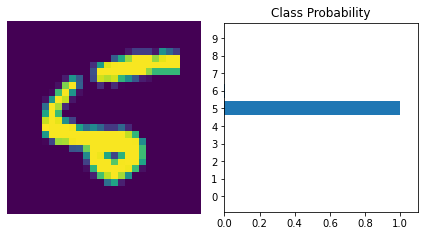

In [19]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.cpu().data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()


images, labels = next(iter(test_dataloader))

img = images[8].view(1, 784)

with torch.no_grad():
    logps = model(img.cuda())

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.cpu().numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)
     

## Saving your model
Using `torch.save`, save your model for future loading.

In [20]:
torch.save(model.state_dict, 'my_model.pt')